In [ ]:
# installing kaggle library

!pip install kaggle

In [ ]:
# uploading kaggle.json file
# configuring the path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# API to fetch the dataset from kaggle

!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compressed dataset

from zipfile import ZipFile
dataset = '/content/sentiment140.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Dataset is Extracted")

Dataset is Extracted


In [ ]:
!pip install scikit-learn==1.3.2
import sklearn
print(sklearn.__version__)


1.3.2


In [ ]:
# modules

import numpy as np
import pandas as pd
import re
import nltk
import random
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.metrics import accuracy_score
from tqdm import tqdm
tqdm.pandas()


In [ ]:
# loading data from csv file

twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')
twitter_data.shape

(1599999, 6)

In [ ]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
# naming the columns

col_name = ['target', 'id', 'date', 'flag', 'user', 'text']

twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names=col_name,encoding='ISO-8859-1')
twitter_data.shape

(1600000, 6)

In [ ]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# dropping irrelevant features

twitter_data = twitter_data.drop(columns=['id', 'date', 'flag', 'user'], axis=1)
twitter_data.shape

(1600000, 2)

In [ ]:
# checking for any missing values

twitter_data.isnull().sum()

,0
target,0
text,0


In [ ]:
# checking the distribution for each class

twitter_data['target'].value_counts()

,count
target,
0,800000
4,800000


0 -> Negative tweet

1 -> Positive tweet

In [ ]:
# remapping the target values
twitter_data.replace({'target':{4:1}}, inplace = True)
twitter_data['target'].value_counts()

,count
target,
0,800000
1,800000


<ipython-input-16-073539418164>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=twitter_data, x='target', palette= ['red', 'green'])


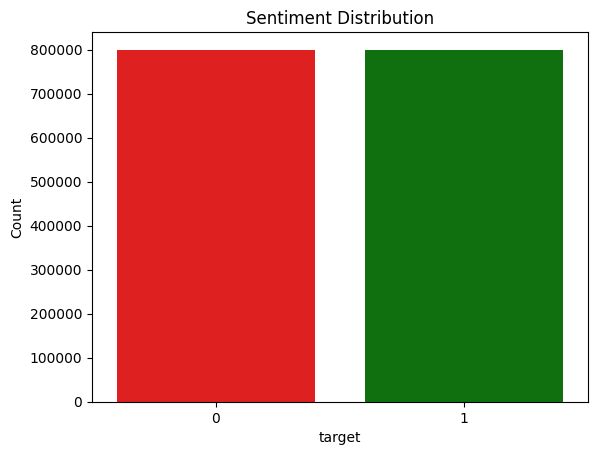

In [ ]:
plt.Figure(figsize=(4,2))
sns.countplot(data=twitter_data, x='target', palette= ['red', 'green'])
plt.title("Sentiment Distribution")
plt.ylabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
# analyzing the random text
random_text = [random.randint(0, twitter_data.shape[0]-1) for i in range(5)]
for i in twitter_data['text'].loc[random_text]:
    print(i,"\n")

@DaniiLovesDiana aww bless! hopes it's all okaaaay  x 

hmm thunder and lightning! I Love it! Now if only I had a tripod and shutter release for my LX3....  #fb 

is so freakin bored....even with all to do i need a time out to have fun....or at least a drink lls  

Just had the best smoothie of my life!!! Passion fruit, banana, and orange. So good. I can't afford take a cruise whenever I want one tho  

oh wow it's pretty empty in here  (thank god) 



In [ ]:
# downloading NLTK resources

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# lemmatizer and stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# function for cleaning text

def clean_text(text):
   # removing URLs
  text = re.sub(r'http\S+|www\S+|https\S+', '', text)

  # removing mentions
  text = re.sub(r'@\w+|[^a-zA-Z\s]', '', text)

  # Convert to lowercase
  text = text.lower()

  # Tokenization
  tokens = word_tokenize(text)

   # removing stopwords and lemmatize
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return ' '.join(tokens)

In [21]:
# using clean_text function in text column of dataset
twitter_data['clean_text'] = twitter_data['text'].progress_apply(clean_text)

100%|██████████| 1600000/1600000 [04:11<00:00, 6369.21it/s]


In [22]:
twitter_data.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [23]:
X = twitter_data['clean_text'].values
y = twitter_data['target'].values

In [24]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [25]:
# converting textual data into numerical data

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Model: Logistic Regression
Training Accuracy: 0.8074
Testing Accuracy: 0.7828
Recall: 0.7828
Precision: 0.7831
F1 Score: 0.7827
----------------------------------------


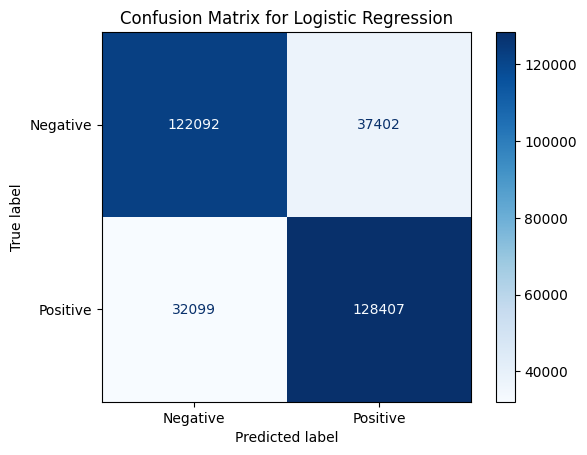

Model: Naive Bayes
Training Accuracy: 0.8074
Testing Accuracy: 0.7638
Recall: 0.7638
Precision: 0.7643
F1 Score: 0.7637
----------------------------------------


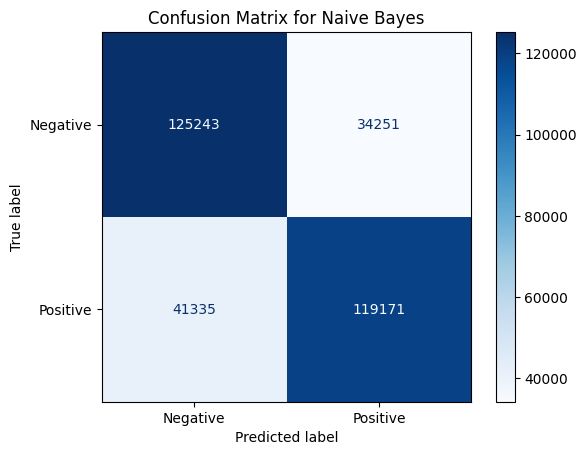

Best Model: Logistic Regression with Testing Accuracy: 0.7828


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB()
}

model_performance = {}
best_model_name = None
best_model_score = 0

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, average='weighted')
    precision = precision_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    model_performance[model_name] = {
        "Training Accuracy": training_accuracy,
        "Testing Accuracy": testing_accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    }

    print(f"Model: {model_name}")
    print(f"Training Accuracy: {training_accuracy:.4f}")
    print(f"Testing Accuracy: {testing_accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("--" * 20)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

    # Check if this model is the best so far
    if testing_accuracy > best_model_score:
        best_model_score = testing_accuracy
        best_model_name = model_name
        best_model = model

print(f"Best Model: {best_model_name} with Testing Accuracy: {best_model_score:.4f}")


In [27]:
# saving the model
import pickle

# Save the best model using pickle
if best_model_name:
    with open(f"{best_model_name.replace(' ', '_')}_best_model.pkl", "wb") as file:
        pickle.dump(best_model, file)
    print(f"Best model '{best_model_name}' saved as '{best_model_name.replace(' ', '_')}_best_model.pkl'")

Best model 'Logistic Regression' saved as 'Logistic_Regression_best_model.pkl'


In [28]:
# loading the saved model

loaded_model = pickle.load(open('/content/Logistic_Regression_best_model.pkl','rb'))

In [38]:
for _ in range(10):
  random_index = random.randint(0, X_test.shape[0]-1)
  X_new = X_test[random_index]
  true_label = y_test[random_index]

  prediction = model.predict(X_new)
  print(f"True Label: {true_label}, Prediction: {prediction}")

True Label: 1, Prediction: [0]
True Label: 0, Prediction: [0]
True Label: 1, Prediction: [1]
True Label: 1, Prediction: [1]
True Label: 1, Prediction: [1]
True Label: 1, Prediction: [1]
True Label: 0, Prediction: [0]
True Label: 1, Prediction: [1]
True Label: 0, Prediction: [0]
True Label: 1, Prediction: [0]


In [39]:
from google.colab import files

# Replace 'Logistic_Regression_best_model.pkl' with your actual file name
files.download('Logistic_Regression_best_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

In [41]:
from google.colab import files
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>